In [153]:
#Project Milestone 5 
#Collecting all the data sets
#Inserting into SQL Lite
#Plots

In [3]:
# Data Source 1 - Flat file data
heart_health_ind = pd.read_csv('/Users/dragon/Documents/repo/DSC540/heart_disease_health_indicators_BRFSS2015.csv') 
heart_health_ind.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
#Data Source 2 - Website Data

# Import Packages

import pandas as pd
import numpy as np
import requests
from requests import get
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

In [6]:
url = "https://www.sciencedaily.com/news/health_medicine/heart_disease/"

In [7]:
# use crawl agent
headers1 = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
results = Request(url, headers=headers1)
webpage = urlopen(results).read()
webpage

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta id="viewport" name="viewport" content="width=device-width, initial-scale=1" />\n<title>Heart Disease News -- ScienceDaily</title>\n<meta name="description" content="Read current medical research on risk factors, causes and prevention of heart disease, strokes, and peripheral arterial disease. What new treatment options are under development?" id="metasummary" />\n<meta name="keywords" content="heart disease; vascular; angioplasty; artery hardening ; cardiac rehabilitation; coronary arteries; narrowing arteries; clogging of the arteries; chronic obstructive pulmonary disease; heart attack risk; stroke; heart risk; obese; bypass; copd; stent; stroke; blood pressure; high blood pressure; hypertension; trigylcerides; cardiopulmonary; cardiovascular; clonidine; hypertension; high nighttime blood pressure; healing the heart; aneurysms; aneurysm formation; athe

In [8]:
#Parse webpage
soup = BeautifulSoup(webpage,"lxml")

In [2]:
# load packages
import pandas as pd
import datetime as dt
import pandas_profiling as pp
from fuzzywuzzy import fuzz
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

/Users/dragon/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
#Extract headlines
import re
for item in soup.findAll(True, {"class": re.compile("^(tab-content)$")}):
    if 'tab-content' in item.attrs['class'] and 'hero' not in    item.attrs['class']:
        headlines = item
headlines

<div class="tab-content">
<div class="tab-pane active" id="summaries" role="tabpanel"> <h3 class="latest-head"><a href="/releases/2022/05/220524163631.htm">New Gene Identified in Arrhythmogenic Cardiomyopathy</a></h3>
<div class="latest-summary">
<span class="story-date">May 24, 2022 </span> Researchers have used advanced sequencing technology to better understand the heart disease arrhythmogenic cardiomyopathy, in which heart muscle tissue is replaced by fat cells. Using explanted human ... </div>
<hr/> <h3 class="latest-head"><a href="/releases/2022/05/220523093350.htm">Statement Updates Ambulatory Blood Pressure Classification in Children and Adolescents</a></h3>
<div class="latest-summary">
<span class="story-date">May 23, 2022 </span> The statement provides simplified classifications for ambulatory blood pressure monitoring (ABPM) in children and adolescents. ABPM is designed to evaluate a person's blood pressure during daily ... </div>
<hr/> <h3 class="latest-head"><a href="/re

In [10]:
#Extract Titles
titles = []
h3_tag = headlines.find_all("h3", class_="latest-head") 
for x in h3_tag:
  for a in x.find_all("a"):
    title = []
    text1 = a.get_text()
    title.append(text1)
    titles.append(title)
titles = pd.DataFrame(titles, columns=['Title'])

In [3]:
mkdir ~/.kaggle

mkdir: /Users/dragon/.kaggle: File exists


In [11]:
titles.head()

,Title
0,New Gene Identified in Arrhythmogenic Cardiomy...
1,Statement Updates Ambulatory Blood Pressure Cl...
2,Haywire T Cells Attack Protein in 'Bad' Choles...
3,"Health Screening, Genetic Tests Might Identify..."
4,New Guideline Refines Care for Brain Bleeds: C...


In [59]:
#Extract dates
dates_descrptions = []
for y in headlines.find_all('div', class_="latest-summary"):
  strip = y.text.strip()
  date_description = []
  date_description.append(strip)
  dates_descrptions.append(date_description)
details = pd.DataFrame(dates_descrptions, columns=['Details']) 
HeartDeceaseorattack = [1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0]

In [58]:
details

,Details
0,"May 24, 2022  Researchers have used advanced ..."
1,"May 23, 2022  The statement provides simplifi..."
2,"May 20, 2022  Detecting these T cells may lea..."
3,"May 18, 2022  Health screening and genetic te..."
4,"May 17, 2022  Several in-hospital treatments ..."
5,"May 16, 2022  Analysis of more than 11,000 pe..."
6,"May 12, 2022  Following a heart attack, the h..."
7,"May 12, 2022  Maternal obesity impairs heart ..."
8,"May 11, 2022  Researchers have shown for the ..."
9,"May 10, 2022  Hypertrophic cardiomyopathy is ..."


In [60]:
heart_df_website = pd.concat([titles, details], axis=1)
heart_df_website['HeartDeceaseorattack'] = HeartDeceaseorattack
heart_df_website.head()

,Title,Details,HeartDeceaseorattack
0,New Gene Identified in Arrhythmogenic Cardiomy...,"May 24, 2022  Researchers have used advanced ...",1.0
1,Statement Updates Ambulatory Blood Pressure Cl...,"May 23, 2022  The statement provides simplifi...",0.0
2,Haywire T Cells Attack Protein in 'Bad' Choles...,"May 20, 2022  Detecting these T cells may lea...",1.0
3,"Health Screening, Genetic Tests Might Identify...","May 18, 2022  Health screening and genetic te...",0.0
4,New Guideline Refines Care for Brain Bleeds: C...,"May 17, 2022  Several in-hospital treatments ...",1.0


In [45]:
# load packages
import pandas as pd
import datetime as dt
import pandas_profiling as pp
from fuzzywuzzy import fuzz
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

/Users/dragon/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [150]:
#API Data Pull 2
import requests
import json
response_API = requests.get('https://heartapi.herokuapp.com/predict?age=31&sex=1&cigs=5&chol=230&sBP=280&dia=0&dBP=90&gluc=87&hRate=84')

In [151]:
data = response_API.text

In [152]:
json.loads(data)

{'data': {'age': '31',
  'cigsPerDay': '5',
  'diaBP': '90',
  'diabetes': '0',
  'glucose': '87',
  'heartRate': '84',
  'sex': '1',
  'sysBP': '280',
  'totChol': '230'},
 'prediction': [1],
 'probability': [[0.4587093009776524, 0.5412906990223476]]}

In [22]:
import zipfile
with zipfile.ZipFile("heart_2020_cleaned.csv.zip","r") as zip_ref:
    zip_ref.extractall()

In [66]:
# Printing Data
heart_API_data = pd.read_csv('heart_2020_cleaned.csv') 
heart_API_data_df=pd.DataFrame(heart_API_data)

def label_HeartDisease(row):
   if row['HeartDisease'] == 'Yes' :
      return 1.0
   return 0.0

heart_API_data_df['HeartDeceaseorattack'] = heart_API_data_df.apply(lambda row: label_HeartDisease(row), axis=1)

In [67]:
heart_API_data_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDeceaseorattack
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0.0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0.0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0.0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0.0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1.0
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0.0
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0.0
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0.0


In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns

In [3]:
#Now we are ready to load each data frame into SQLite.
#First, connecting to the database
conn = sql.connect('HeartHealth_database.db')
c = conn.cursor()
#  function to make sure the connection is successful
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall()) # print list of tables in petsdb

[('heart_health_indicators',), ('heart_df_website',), ('heart_health_details',), ('heart_decease',), ('Heart_Health',)]


In [16]:
#Inserting the flat file data frame into SQLite
heart_health_ind.to_sql('heart_health_indicators', conn)

In [17]:

#Printing the data we inserted
sql1 = pd.read_sql('SELECT * FROM heart_health_indicators', conn)
sql1

,index,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [71]:
#Inserting the website data frame into SQLite
heart_df_website.to_sql('heart_health_details', conn)

In [72]:
#Printing Website Data

sql1 = pd.read_sql('SELECT * FROM heart_health_details', conn)
sql1

,index,Title,Details,HeartDeceaseorattack
0,0,New Gene Identified in Arrhythmogenic Cardiomy...,"May 24, 2022  Researchers have used advanced ...",1.0
1,1,Statement Updates Ambulatory Blood Pressure Cl...,"May 23, 2022  The statement provides simplifi...",0.0
2,2,Haywire T Cells Attack Protein in 'Bad' Choles...,"May 20, 2022  Detecting these T cells may lea...",1.0
3,3,"Health Screening, Genetic Tests Might Identify...","May 18, 2022  Health screening and genetic te...",0.0
4,4,New Guideline Refines Care for Brain Bleeds: C...,"May 17, 2022  Several in-hospital treatments ...",1.0
5,5,Artery Stiffness May Predict Type 2 Diabetes R...,"May 16, 2022  Analysis of more than 11,000 pe...",0.0
6,6,Cardiac Progenitor Cells Generate Healthy Tiss...,"May 12, 2022  Following a heart attack, the h...",1.0
7,7,Obesity in Pregnancy Increases Risk of Lifelon...,"May 12, 2022  Maternal obesity impairs heart ...",1.0
8,8,Flu Causes Cardiac Complications by Directly I...,"May 11, 2022  Researchers have shown for the ...",1.0
9,9,Single Cell RNA Sequencing Uncovers New Mechan...,"May 10, 2022  Hypertrophic cardiomyopathy is ...",0.0


In [73]:
c.executescript('drop table if exists heart_decease;')

In [74]:
#Inserting the API data frame into SQLite
heart_API_data.to_sql('heart_decease', conn)

In [75]:
# Printing API data
sql1 = pd.read_sql('SELECT * FROM heart_decease', conn)
sql1

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDeceaseorattack
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0.0
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0.0
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0.0
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0.0
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,1.0
319791,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0.0
319792,319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,0.0
319793,319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,0.0


In [23]:
# Creating Summary heart_decease
c.executescript('drop table if exists heart_decease_Summary;')
c.executescript("""CREATE table  heart_decease_Summary AS WITH summary AS (
    SELECT *, 
           ROW_NUMBER() OVER(PARTITION BY GenHealth 
                                 ORDER BY BMI ASC) AS rank
      FROM heart_decease)
 SELECT *
   FROM summary
 WHERE rank < 10;""")
sql6=pd.read_sql('SELECT * FROM heart_decease_Summary', conn)

sql6


,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,...,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDeceaseorattack,rank
0,51637,No,12.13,No,No,No,0.0,0.0,No,Male,...,White,No,Yes,Excellent,7.0,No,No,No,0.0,1
1,5037,No,12.75,Yes,Yes,No,0.0,0.0,No,Male,...,White,No,Yes,Excellent,5.0,No,No,No,0.0,2
2,131189,No,12.84,No,No,No,0.0,0.0,No,Female,...,Asian,No,Yes,Excellent,6.0,No,No,No,0.0,3
3,282873,No,12.85,No,No,No,0.0,0.0,No,Male,...,Black,No,Yes,Excellent,6.0,No,No,No,0.0,4
4,94705,No,12.88,No,No,No,0.0,0.0,No,Male,...,White,No,Yes,Excellent,5.0,No,No,No,0.0,5
5,128746,No,12.88,No,No,No,0.0,0.0,No,Male,...,White,No,Yes,Excellent,7.0,No,No,No,0.0,6
6,279208,No,12.88,Yes,Yes,No,0.0,0.0,No,Female,...,White,No,No,Excellent,6.0,Yes,No,No,0.0,7
7,63222,No,12.91,No,No,No,0.0,0.0,No,Female,...,Asian,No,Yes,Excellent,6.0,No,No,No,0.0,8
8,100129,No,12.91,No,No,No,0.0,0.0,No,Male,...,Other,No,Yes,Excellent,8.0,No,No,No,0.0,9
9,1688,Yes,12.48,Yes,No,Yes,12.0,2.0,No,Male,...,Black,No,No,Fair,12.0,No,Yes,No,1.0,1


In [26]:
#Creating Summary
c.executescript('drop table if exists Heart_Health_Summary;')
c.executescript("""CREATE table  Heart_Health_Summary AS WITH summary AS (
    SELECT *, 
           ROW_NUMBER() OVER(PARTITION BY HeartDiseaseorAttack 
                                 ORDER BY BMI ASC) AS rank
      FROM heart_health_indicators)
 SELECT *
   FROM summary
 WHERE rank < 50;""")
sql4=pd.read_sql('SELECT * FROM Heart_Health_Summary', conn)

sql4



,index,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,rank
0,49827,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,1.0,...,1.0,3.0,0.0,1.0,0.0,1.0,9.0,2.0,8.0,1
1,98002,0.0,0.0,0.0,1.0,12.0,1.0,0.0,0.0,1.0,...,0.0,2.0,15.0,0.0,0.0,1.0,11.0,6.0,7.0,2
2,136036,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,1.0,0.0,13.0,5.0,2.0,3
3,210863,0.0,0.0,0.0,1.0,12.0,1.0,0.0,0.0,1.0,...,0.0,2.0,8.0,0.0,0.0,1.0,6.0,6.0,8.0,4
4,239607,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,7.0,4.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,90584,1.0,0.0,0.0,1.0,16.0,1.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,0.0,0.0,11.0,5.0,3.0,45
94,93759,1.0,0.0,1.0,1.0,16.0,1.0,0.0,0.0,0.0,...,1.0,5.0,20.0,20.0,1.0,0.0,11.0,4.0,2.0,46
95,95150,1.0,1.0,0.0,1.0,16.0,0.0,1.0,0.0,0.0,...,0.0,4.0,7.0,7.0,1.0,1.0,13.0,2.0,6.0,47
96,105742,1.0,1.0,1.0,1.0,16.0,0.0,0.0,2.0,1.0,...,0.0,3.0,0.0,30.0,0.0,0.0,12.0,4.0,7.0,48


In [48]:
# Merge datasets with a key
Merged_Date = pd.read_sql("""SELECT hhi.HeartDiseaseorAttack,hhi.HighBP,hhi.Age
,hhi.HighChol,hhi.CholCheck,hhi.PhysActivity, hhd.Title,hhd.Details, hhs.AlcoholDrinking, hhs.Race,
hhs.SleepTime,hhs.GenHealth,hhs.BMI,hhs.PhysicalHealth,hhs.MentalHealth
FROM Heart_Health_Summary hhi 
INNER JOIN heart_health_details hhd  ON hhi.HeartDiseaseorAttack=hhd.HeartDeceaseorattack
INNER JOIN heart_decease_Summary hhs ON hhi.HeartDiseaseorAttack=hhd.HeartDeceaseorattack
""",conn)


In [49]:
Merged_Data

,HeartDiseaseorAttack,HighBP,Age,HighChol,CholCheck,PhysActivity,Title,Details,AlcoholDrinking,Race,SleepTime,GenHealth,BMI,PhysicalHealth,MentalHealth
0,0.0,0.0,9.0,0.0,1.0,1.0,Artery Stiffness May Predict Type 2 Diabetes R...,"May 16, 2022  Analysis of more than 11,000 pe...",No,White,7.0,Excellent,12.13,0.0,0.0
1,0.0,0.0,9.0,0.0,1.0,1.0,Common Gene Variant in Three Seemingly Unrelat...,"May 10, 2022  It's always rewarding when what...",No,White,7.0,Excellent,12.13,0.0,0.0
2,0.0,0.0,9.0,0.0,1.0,1.0,"Health Screening, Genetic Tests Might Identify...","May 18, 2022  Health screening and genetic te...",No,White,7.0,Excellent,12.13,0.0,0.0
3,0.0,0.0,9.0,0.0,1.0,1.0,How MRI Could Revolutionize Heart Failure Diag...,"May 5, 2022  Until now, the best way of diagn...",No,White,7.0,Excellent,12.13,0.0,0.0
4,0.0,0.0,9.0,0.0,1.0,1.0,Mental Illness Plays Havoc With the Mind as We...,"May 3, 2022  We need to pay more attention to...",No,White,7.0,Excellent,12.13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44095,1.0,1.0,10.0,1.0,1.0,0.0,New Gene Identified in Arrhythmogenic Cardiomy...,"May 24, 2022  Researchers have used advanced ...",No,White,7.0,Very good,12.91,0.0,0.0
44096,1.0,1.0,10.0,1.0,1.0,0.0,New Guideline Refines Care for Brain Bleeds: C...,"May 17, 2022  Several in-hospital treatments ...",No,White,7.0,Very good,12.91,0.0,0.0
44097,1.0,1.0,10.0,1.0,1.0,0.0,Obesity in Pregnancy Increases Risk of Lifelon...,"May 12, 2022  Maternal obesity impairs heart ...",No,White,7.0,Very good,12.91,0.0,0.0
44098,1.0,1.0,10.0,1.0,1.0,0.0,Surprising Risk Factors May Predict Heart Atta...,"May 4, 2022  A new study has for the first ti...",No,White,7.0,Very good,12.91,0.0,0.0


In [50]:
# drop duplicates
Dedup_Data = Merged_Data.T.drop_duplicates().T


In [51]:
c.executescript('drop table if exists Heart_Summary_Final;')
#Inserting the merged data frame into SQLite
Merged_Data.to_sql('Heart_Summary_Final', conn)

In [127]:
#Using distinct to avoid duplicates as forgot to insert dedup data in the table
Query = pd.read_sql('SELECT Distinct Title,PhysActivity FROM Heart_Summary_Final ORDER BY GenHealth', conn)

In [88]:
#query of the Age, SleepTime & HighBP
Query = pd.read_sql('SELECT Distinct Age,SleepTime, HighBP FROM Heart_Summary_Final ORDER BY GenHealth', conn)

In [89]:
Query

,Age,SleepTime,HighBP
0,9.0,7.0,0.0
1,9.0,5.0,0.0
2,9.0,6.0,0.0
3,9.0,8.0,0.0
4,11.0,7.0,0.0
...,...,...,...
205,9.0,20.0,1.0
206,13.0,10.0,1.0
207,13.0,20.0,1.0
208,8.0,10.0,1.0


In [96]:
ordered = Query.groupby(['HighBP']).count().sort_values(by = ['SleepTime'])

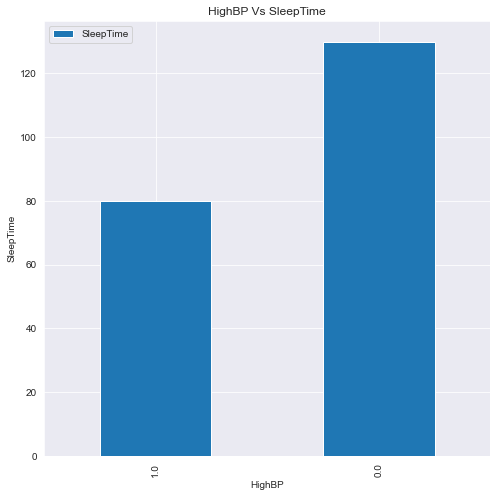

In [149]:
#bar chart for SleepTime

ordered.plot.bar(y = 'SleepTime')
plt.ylabel('SleepTime')
plt.title('HighBP Vs SleepTime')
plt.show()

In [58]:
plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

In [82]:
#Query for SleepTime
Query_SleepTime = pd.read_sql('SELECT SleepTime FROM Heart_Summary_Final', conn)

In [83]:
Query_SleepTime

,SleepTime,HeartDiseaseorAttack
0,7.0,0.0
1,7.0,0.0
2,7.0,0.0
3,7.0,0.0
4,7.0,0.0
...,...,...
44095,7.0,1.0
44096,7.0,1.0
44097,7.0,1.0
44098,7.0,1.0


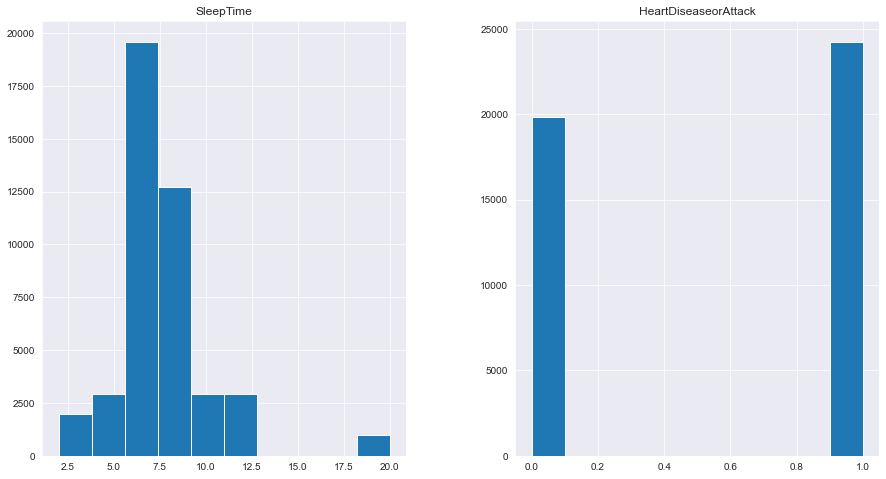

In [84]:
#Plotting The chart for SleepTime
plt.rcParams['figure.figsize']= (15,8) # reajustar o tamanho da figura 

Query_SleepTime.hist();

In [68]:
#Query for BMI where the HeartDisease =1
Query_BMI = pd.read_sql('SELECT Distinct BMI FROM Heart_Summary_Final Where HeartDiseaseorAttack = 1.0', conn)

/Users/dragon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


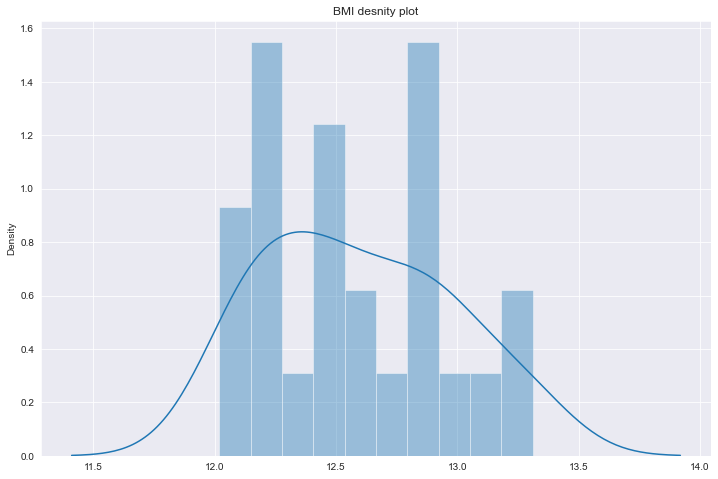

In [71]:
#BMI Density Plot
sns.distplot(Query_BMI, bins=10)
plt.title('BMI desnity plot');

In [118]:
#Query for Mental Health & BMI
Query_Phy = pd.read_sql('SELECT MentalHealth,PhysActivity,BMI FROM Heart_Summary_Final ORDER BY GenHealth', conn)

Text(0.5, 1.0, ' BMI vs MentalHealth in rest')

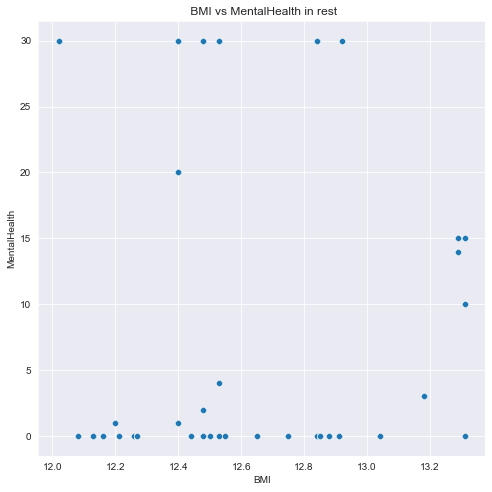

In [126]:
#Scatter plot for BMI & Mental Health
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='BMI', y='MentalHealth', size=None, data=Query_Phy)
plt.title(' BMI vs MentalHealth in rest')

In [145]:
#Query for Sex and Sleeptime
Query_Sex = pd.read_sql('SELECT Sex, SleepTime FROM heart_decease_Summary', conn)
Query_Sex

,Sex,SleepTime
0,Male,7.0
1,Male,5.0
2,Female,6.0
3,Male,6.0
4,Male,5.0
5,Male,7.0
6,Female,6.0
7,Female,6.0
8,Male,8.0
9,Male,12.0


<AxesSubplot:xlabel='Sex', ylabel='SleepTime'>

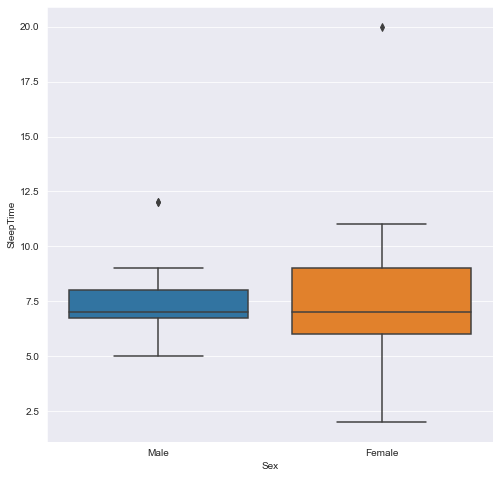

In [147]:
#Box plot for Sex & SleepTime
sns.boxplot(x='Sex', y='SleepTime', data=Query_Sex)

In [ ]:
#Summary

#Graph 1  - Plotting The chart for SleepTime:

